<a href="https://colab.research.google.com/github/ricardomoyer/FusionClient/blob/master/Quicksort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How does quicksort work?

Most popular implementation is explained above:

Quicksort is a divide-and-conquer algorithm, which means you will have to divide an array over and over so the problem is easier to solve. One of the most particular characteristics of quicksort algorithm is the use of a pivot. 

This pivot is chosen differently, depending on the implementation of the algorithm. There are 4 common options to get a pivot.


•	The left value of an array (at the beginning).

•	The right value of an array (at the end).

•	By random choice.

•	Using the median of the numbers in the array.


In this explanation, a random pivot is to be chosen. 
Let’s suppose the following array:


A = [15, 3, 9, 8, 5, 2, 7, 1, 6]


Let’s suppose our pivot (randomly selected) was a 7.


We want to use this pivot as a reference point. The rules for our pivot is simple:

•	**Numbers that are smaller than our pivot must be at the left of the pivot.**

•	**Numbers that are greater than the pivot must be at the right of the pivot.** 


We have two index to navigate through the values of the array. Let us imagine two arrows checking weather a value is greater or smaller than our pivot. In this case, this arrow number will be represented as a remarked letter. Our pivot is to be red.
A = [15, 3, 1, 8, 5, 2, 7, 9, 6]


QUICKSORT(A, p,r)

     if p < r

          then q ← PARTITION(A, p,r)

              QUICKSORT(A, p, q − 1)

              QUICKSORT(A, q + 1,r)

To sort an entire array A, the initial call is 

QUICKSORT(A, 1,length[A]).

Partitioning the array

The key to the algorithm is the PARTITION procedure, 

which rearranges the subarray A[p . .r] in place.

PARTITION(A, p,r)

      x ← A[r]

      i ← p − 1

     for j ← p to r − 1

         do if A[j] ≤ x

             then i ← i + 1

                 exchange A[i] ↔ A[j]

     exchange A[i + 1] ↔ A[r]

     return i + 1

In [0]:
# Hace fa

def quicksort(i_izq, i_der, L):
    # definimos los índices y calculamos el pivote
    indice_izq = i_izq
    indice_der = i_der    

    '''
    AQUÍ PUEDE VARIAR LA IMPLEMENTACIÓN DEL PIVOTE
    '''
    pivote = (L[indice_izq] + L[indice_der]) // 2
    #print("Pivot:",pivote)

    # iteramos hasta que indice_izq (sea mayor) no sea menor que indice_der
    while indice_izq < indice_der:
        # iteramos mientras que el valor de L[indice_izq] sea menor que pivote

        ''' AQUI ESTAMOS BUSCANDO EL NUMERO MAYOR AL PIVOTE POR LA IZQUIERDA '''
        while L[indice_izq] < pivote:
            # aumentamos el indice hasta encontrar el valor
            indice_izq+=1

        ''' AQUI ESTAMOS BUSCANDO EL NUMERO MENOR AL PIVOTE POR LA DERECHA '''
        while L[indice_der] > pivote:
            # reducimos el indice hasta encontrar el valor
            indice_der-=1
        
        # si indice_izq es menor o igual que indice_der significa que los índices se han cruzado
        if indice_izq <= indice_der:
            # creamos una variable temporal para guardar el valor de L[indice_der]
            x = L[indice_der]
            # intercambiamos los valores de L[indice_der] y L[indice_izq]
            L[indice_der] = L[indice_izq]
            L[indice_izq] = x
            # incrementamos y decrementamos indice_izq y indice_der respectivamente
            indice_izq+=1
            indice_der-=1

    # si i_izq es menor que indice_der mantenemos la recursividad
    if i_izq < indice_der:
        L = quicksort(i_izq, indice_der, L)
    # si i_der es mayor que indice_izq mantenemos la recursividad
    if i_der > indice_izq:
        L = quicksort(indice_izq, i_der, L)

    # devolvemos la lista ordenada
    return L

# Complexity Analysis

### BEST case

Supposing that we always chose a bad pivot to make the partitions (that means, the number is the smallest or greatest number in the array). Every time the recursion is made, it will go through n-1 elements of the previews array.

The time it will take can be represented with the next formula

c((n+1)(n/2)-1) = O(n^2)


[Image](https://cdn.kastatic.org/ka-perseus-images/21cd0d70813845d67fbb11496458214f90ad7cb8.png)



### WORST case

On the other hand, the best case will take place when every time the partitions are made, each half of it is balanced as much as it can be. So every in every recursive step the new size of the array to sort will have (n-1)/2 elements. This may vary if the array have odd or even number of elements. 
In any case, it will be  O(n log_2(n))


[Another image](https://cdn.kastatic.org/ka-perseus-images/7da2ac32779bef669a6f05decb62f219a9132158.png)




### AVERAGE case

We will make some assumptions here, but in a brief way, the average case will still be O(n*log_2(n)), because even if the partitions are unbalanced after partitioning, the side with the fewest elements will end up with a size 1 array in fewer steps than the side with the most elements. In any case, the difference in steps would be c, so for the O() notation this would not mean a change in its growth rate
[Another one](https://cdn.kastatic.org/ka-perseus-images/130b2d2a1fe897253def054f4c3aa7bd94cb6cf2.png)

# Implementation 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
from functools import partial
import pandas as pd

In [0]:
# We use a seed to always generate the same k
np.random.seed(1)

random_list_for_tests = np.random.randint(1,5000,15)
print(random_list_for_tests)

[ 236 3981  906 2764 2896  145 4226 2798 3463 1203 4454 2963 2517  253
 3563]


In [0]:
# Test quicksort Algorithm
print(quicksort(0,len(random_list_for_tests.copy())-1, random_list_for_tests.copy()))

[ 145  236  253  906 1203 2517 2764 2798 2896 2963 3463 3563 3981 4226
 4454]


## Time calculator function

In [0]:
sortings = {
    'quicksort': quicksort
}


def calculate_runtimes(range_of_x, repetitions, sorting_method):
    # Partial function that generates lists of n lenght
    np.random.seed(1)
    random_list_n = partial(np.random.randint, 1,5000)
    
    # to keep track of the durations
    duration = []
    
    # TO CALCULATE THE TIME FOR EVERY VALUE OF N
    for n in range_of_x:
        #the mean in a given value of n
        mean_duration = []
        
        # generate a random list of size n
        np.random.seed(1)
        list_of_size_n = random_list_n(n)
        
        # TO TAKE THE MEAN OF THE TIME OF A GIVEN VALUE OF N
        for i in range(repetitions):
            start = time.time()
            sortings[sorting_method](0, len(list_of_size_n)-1, list_of_size_n)        
            end = time.time()
            mean_duration.append(end-start)

        # the mean of the time in the loop above
        duration.append(np.array(mean_duration).mean())
    return duration

## Running Time

In [0]:
# Defining the intervals
lower_size_of_list = 200
upper_size_of_list = 3000
size_of_step = 14

# Range of 'n' to generate lists of size n
x = np.linspace(lower_size_of_list, upper_size_of_list, size_of_step, dtype=int)

# to calculate the mean
number_of_repetitions=5

# partial function that keeps the same values every time
calc_run = partial(calculate_runtimes, x, number_of_repetitions)

In [0]:
quicksort_duration = calc_run('quicksort')

In [0]:
pd.DataFrame(data={'size': x,
                    'QuickSort':quicksort_duration
                  })

,size,QuickSort
0,200,0.001535
1,415,0.001687
2,630,0.002547
3,846,0.003790
4,1061,0.004326
5,1276,0.005330
6,1492,0.006045
7,1707,0.007138
8,1923,0.009116
9,2138,0.009830


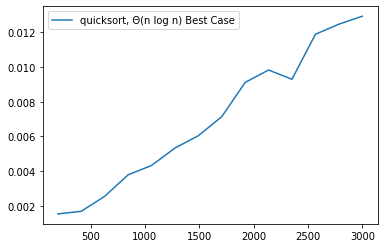

In [0]:
plt.plot(x, quicksort_duration, label='quicksort, Θ(n log n) Best Case')
plt.legend()